<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
  X_train = X_train / 255.
  X_test = X_test / 255.
  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

In [ ]:
X_train.shape

(80000, 784)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [17]:
##### Your Code Here #####

def create_model(lr=0.01, opt = 'Adam'):
  if opt == 'Adam':
    opt = Adam(learning_rate=lr)
  elif opt == 'Adagrad':
    opt = Adagrad(learning_rate=lr)
  elif opt == 'Adadelta':
    opt = Adadelta(learning_rate=lr)
  elif opt == 'SGD':
    opt = SGD(learning_rate=lr)
  elif opt == 'Nadam':
    opt = Nadam(learning_rate=lr)
  model = Sequential([
    Dense(32, activation='sigmoid', input_dim=784),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
    ])
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)

In [19]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [20]:
bt_32 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.8150 - accuracy: 0.7485 - val_loss: 0.7021 - val_accuracy: 0.7819
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6558 - accuracy: 0.7998 - val_loss: 0.6645 - val_accuracy: 0.7984
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6104 - accuracy: 0.8135 - val_loss: 0.6421 - val_accuracy: 0.8080
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5908 - accuracy: 0.8190 - val_loss: 0.6162 - val_accuracy: 0.8108
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5744 - accuracy: 0.8257 - val_loss: 0.6227 - val_accuracy: 0.8144
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5600 - accuracy: 0.8305 - val_loss: 0.6309 - val_accuracy: 0.8116
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5465 - accuracy: 0.8338 - val_loss: 0.6266 - val_accuracy:

In [21]:
bt_8 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4535 - accuracy: 0.8621 - val_loss: 0.6248 - val_accuracy: 0.8189
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4481 - accuracy: 0.8637 - val_loss: 0.6347 - val_accuracy: 0.8162
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4463 - accuracy: 0.8633 - val_loss: 0.6352 - val_accuracy: 0.8164
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4442 - accuracy: 0.8644 - val_loss: 0.6313 - val_accuracy: 0.8159
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8659 - val_loss: 0.6277 - val_accuracy: 0.8200
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4323 - accuracy: 0.8688 - val_loss: 0.6333 - val_accuracy: 0.8180
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4336 - accuracy: 0.8678 - val_loss: 0.6286 - val_accuracy:

In [22]:
bt_16 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4019 - accuracy: 0.8770 - val_loss: 0.6548 - val_accuracy: 0.8196
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8799 - val_loss: 0.6540 - val_accuracy: 0.8162
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8802 - val_loss: 0.6579 - val_accuracy: 0.8194
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3961 - accuracy: 0.8793 - val_loss: 0.6625 - val_accuracy: 0.8154
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3924 - accuracy: 0.8796 - val_loss: 0.6664 - val_accuracy: 0.8138
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3881 - accuracy: 0.8814 - val_loss: 0.6653 - val_accuracy: 0.8182
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3884 - accuracy: 0.8821 - val_loss: 0.6618 - val_accuracy:

In [23]:
bt_64 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8886 - val_loss: 0.6826 - val_accuracy: 0.8151
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8891 - val_loss: 0.6936 - val_accuracy: 0.8132
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.8903 - val_loss: 0.6889 - val_accuracy: 0.8173
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8880 - val_loss: 0.6822 - val_accuracy: 0.8148
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8894 - val_loss: 0.6950 - val_accuracy: 0.8110
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3628 - accuracy: 0.8899 - val_loss: 0.6975 - val_accuracy: 0.8152
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3604 - accuracy: 0.8895 - val_loss: 0.7024 - val_accuracy:

In [24]:
bt_128 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8956 - val_loss: 0.7095 - val_accuracy: 0.8108
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3481 - accuracy: 0.8933 - val_loss: 0.7085 - val_accuracy: 0.8108
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8936 - val_loss: 0.7157 - val_accuracy: 0.8136
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3431 - accuracy: 0.8947 - val_loss: 0.7201 - val_accuracy: 0.8127
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.8950 - val_loss: 0.7207 - val_accuracy: 0.8136
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8958 - val_loss: 0.7301 - val_accuracy: 0.8084
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8953 - val_loss: 0.7274 - val_accuracy:

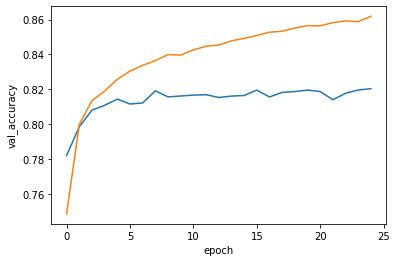

In [27]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(bt_32.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df)
ax = sns.lineplot(x='epoch', y='accuracy', data=df);

In [26]:
df.head

<bound method NDFrame.head of     accuracy      loss  val_accuracy  val_loss  epoch
0   0.748453  0.814969       0.78195  0.702079      0
1   0.799812  0.655751       0.79845  0.664525      1
2   0.813500  0.610388       0.80800  0.642054      2
3   0.819000  0.590826       0.81080  0.616217      3
4   0.825750  0.574380       0.81435  0.622731      4
5   0.830453  0.560037       0.81155  0.630940      5
6   0.833766  0.546509       0.81215  0.626621      6
7   0.836453  0.540251       0.81910  0.615938      7
8   0.839906  0.530433       0.81565  0.629281      8
9   0.839609  0.526516       0.81615  0.611285      9
10  0.842609  0.517798       0.81665  0.620139     10
11  0.844703  0.511329       0.81690  0.622268     11
12  0.845391  0.506047       0.81530  0.625315     12
13  0.847797  0.498798       0.81610  0.622629     13
14  0.849219  0.494795       0.81645  0.617743     14
15  0.850875  0.489910       0.81955  0.614419     15
16  0.852781  0.483485       0.81560  0.624643     1

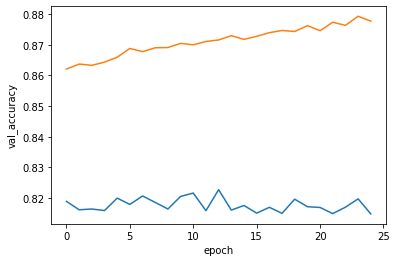

In [28]:
df2 = pd.DataFrame.from_records(bt_8.history)
df2['epoch'] = [i for i in range(df2.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df2)
ax = sns.lineplot(x='epoch', y='accuracy', data=df2);

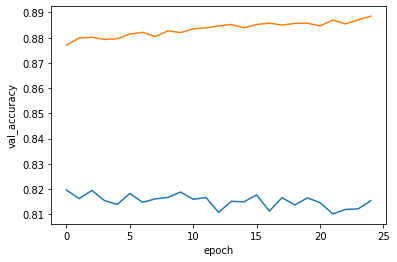

In [29]:
df3 = pd.DataFrame.from_records(bt_16.history)
df3['epoch'] = [i for i in range(df3.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df3)
ax = sns.lineplot(x='epoch', y='accuracy', data=df3);

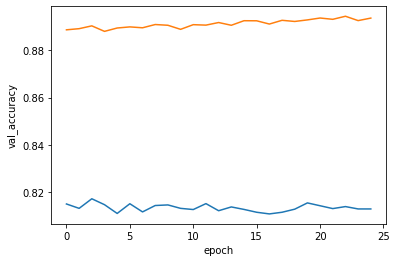

In [30]:
df4 = pd.DataFrame.from_records(bt_64.history)
df4['epoch'] = [i for i in range(df4.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df4)
ax = sns.lineplot(x='epoch', y='accuracy', data=df4);

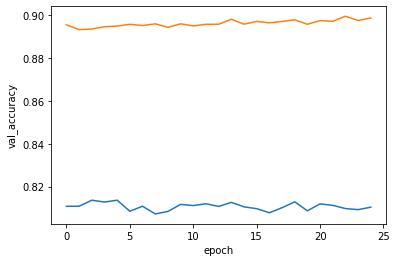

In [31]:
df5 = pd.DataFrame.from_records(bt_128.history)
df5['epoch'] = [i for i in range(df5.shape[0])]

ax = sns.lineplot(x='epoch', y='val_accuracy', data=df5)
ax = sns.lineplot(x='epoch', y='accuracy', data=df5);

In [32]:

batch_sizes = []

for exp, result in zip([bt_8, bt_16, bt_32, bt_64, bt_128], ["8_", "16_", "32_", "64_", "128_"]):
    df10 = pd.DataFrame.from_dict(exp.history)
    df10['epoch'] = df10.index.values
    df10['Batch Size'] = result
    batch_sizes.append(df10)

df10 = pd.concat(batch_sizes)
df10['Batch Size'] = df10['Batch Size'].astype('str')
df10.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.453496,0.862094,0.624776,0.81895,0,8_
1,0.448115,0.863719,0.634717,0.81620,1,8_
2,0.446271,0.863297,0.635151,0.81645,2,8_
3,0.444207,0.864359,0.631292,0.81595,3,8_
4,0.439931,0.865937,0.627700,0.82000,4,8_


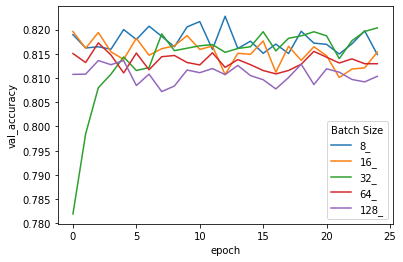

In [34]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df10);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [35]:
model2 = create_model(1)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


